

# Example of fields and operators acting on them

Simple script to show a 2D vector field and apply curl and divergence operator on it.

- can you predict from looking at the vectorfield what the qualitative outcome of curl (rotor) and divergence (divergentie) operators will be?
- how would the same exercise look in 3D?
- can you intuitively explain what a gradient of a scalar field looks like?
- can you verify the numerical results with an analytical expression for the given vector and scalar field? (maybe you discover scaling factor errors in the code)

(c) Jo Verbeeck sept 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib inline

Create a 2D grid (3D is equally possible but harder to visualise)

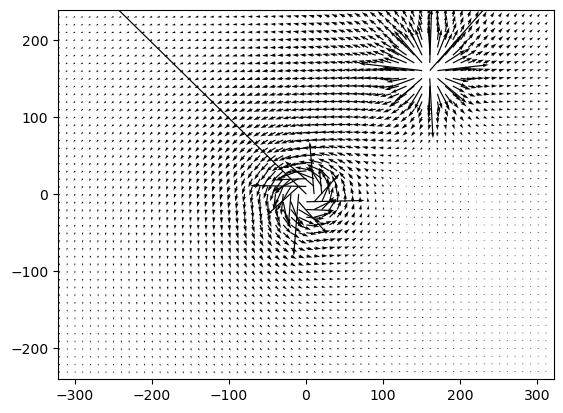

In [2]:
xpoints = 640
ypoints = 480
skippts=10

xmax = xpoints/2
ymax = ypoints/2

skip=(slice(None,None,skippts),slice(None,None,skippts)) #don't plot all the point as this get too messy

x=np.linspace(-xmax,xmax,xpoints)
y=np.linspace(-ymax,ymax,ypoints)
xd=x[1]-x[0]
x2d,y2d=np.meshgrid(x,y,indexing='xy')
r2d=np.sqrt(x2d**2 + y2d**2+xd**2) #xd to avoid divide by zero in center
r2d2=np.sqrt((x2d-xmax/2)**2 + (y2d-xmax/2)**2+xd**2)

u = -y2d/r2d**2 + (x2d-xmax/2)/r2d2**2
v =  x2d/r2d**2 + (y2d-xmax/2)/r2d2**2

plt.quiver(x2d[skip],y2d[skip],u[skip],v[skip])
plt.axis('equal')
plt.xlim([-xmax,xmax])
plt.ylim([-ymax,ymax])
plt.show()

In [3]:
# https://stackoverflow.com/questions/71990386/calculating-divergence-and-curl-from-optical-flow-and-plotting-it

def extract_uv_flow_bgr(image_in,scalar=1):
    
    hsv = cv2.cvtColor(image_in, cv2.COLOR_BGR2HSV)

    mag = scalar * (hsv[..., 2] / 255.0)
    angle = (hsv[..., 0] * np.pi * 2.0) / 180.0 # angles are in radians here

    xmax=np.shape(image)[1]
    xpoints = int(np.shape(image)[1])
    x=np.linspace(0,np.shape(image)[1],xmax)

    ymax=np.shape(image)[0]
    ypoints = int(np.shape(image)[0])
    y=np.linspace(0,np.shape(image)[0],ymax)

    x2d,y2d=np.meshgrid(x,y,indexing='xy')

    u = mag * np.cos(angle) # this is the same as flow[...,0] * mag * -1, as I did above
    v = mag  * np.sin(angle)
    
    return u,v

def divergence_npgrad(u, v):
    dFx_dx = np.gradient(v, axis=0)
    dFy_dy = np.gradient(u, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(u, v):    
    dFx_dy = np.gradient(v, axis=1)
    dFy_dx = np.gradient(u, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

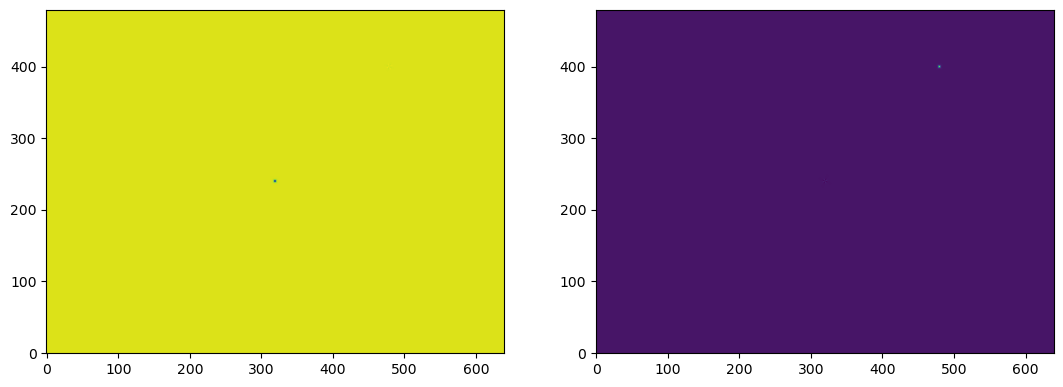

In [4]:

curlz = curl_npgrad(u, v)
divergence = divergence_npgrad(u, v)

figure, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 5))
ax1.imshow(curlz,origin='lower')
ax2.imshow(divergence,origin='lower')


In [ ]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(2,2,figsize=(13, 5))

xpoints = 640
ypoints = 480
skippts=10

xmax = xpoints/2
ymax = ypoints/2

skip=(slice(None,None,skippts),slice(None,None,skippts)) #don't plot all the point as this get too messy

x=np.linspace(-xmax,xmax,xpoints)
y=np.linspace(-ymax,ymax,ypoints)
xd=x[1]-x[0]
x2d,y2d=np.meshgrid(x,y,indexing='xy')
r2d=np.sqrt(x2d**2 + y2d**2+xd**2) #xd to avoid divide by zero in center
r2d2=np.sqrt((x2d-xmax/2)**2 + (y2d-xmax/2)**2+xd**2)

u = -y2d/r2d**2 + (x2d-xmax/2)/r2d2**2
v =  x2d/r2d**2 + (y2d-xmax/2)/r2d2**2

plt.quiver(x2d[skip],y2d[skip],u[skip],v[skip])
plt.axis('equal')
plt.xlim([-xmax,xmax])
plt.ylim([-ymax,ymax])
plt.show()



curlz = curl_npgrad(u, v)
divergence = divergence_npgrad(u, v)


ax1.imshow(curlz,origin='lower')
ax2.imshow(divergence,origin='lower')

